# Loading & Exploring Datasets

In [2]:
import pandas as pd
import numpy as np


In [3]:
apps_df = pd.read_csv("C:\\Users\\KHAN\\Downloads\\googleplaystore.csv")
reviews_df = pd.read_csv("C:\\Users\\KHAN\\Downloads\\googleplaystore_user_reviews.csv")


In [26]:
# Work on a copy to avoid chained assignments
apps_df = apps_df.copy()


In [27]:
print(apps_df.shape)



(9366, 13)


In [28]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [29]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [30]:

print(reviews_df.shape)



(64295, 5)


In [31]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [32]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# Cleaning Each Dataset Individually


Cleaning googleplaystore.csv


This involves:

Removing nulls and fixing datatypes.

Handling 'Size', 'Price', 'Installs'.

Converting types like Reviews to int, Installs to int, etc.

In [33]:
#Convert 'Rating' safely
apps_df['Rating'] = pd.to_numeric(apps_df['Rating'], errors='coerce')

In [34]:
#Filter rows with valid ratings (≤ 5)
apps_df = apps_df[apps_df['Rating'] <= 5].copy()  # copy ensures no chained warning

In [35]:
#Clean other columns safely
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'], errors='coerce')

In [36]:
apps_df['Installs'] = apps_df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True)
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')


In [37]:
apps_df['Price'] = apps_df['Price'].astype(str).str.replace('$', '', regex=False)
apps_df['Price'] = pd.to_numeric(apps_df['Price'], errors='coerce')


In [38]:
#Convert 'Size' column
def convert_size(size):
    try:
        if 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'k' in size:
            return float(size.replace('k', '')) * 1024
    except:
        return np.nan
    return np.nan

In [39]:
apps_df['Size'] = apps_df['Size'].astype(str)
apps_df['Size_in_bytes'] = apps_df['Size'].apply(convert_size)
apps_df['Size_MB'] = apps_df['Size_in_bytes'] / (1024 * 1024)


In [40]:
# Handle missing values
apps_df.dropna(subset=['App', 'Category', 'Type', 'Content Rating', 'Genres'], inplace=True)
apps_df['Rating'].fillna(apps_df['Rating'].mean(), inplace=True)


In [41]:
# Drop duplicates
apps_df.drop_duplicates(inplace=True)


In [42]:
# Final check
print("Cleaned shape:", apps_df.shape)

Cleaned shape: (8892, 15)


# Clean googleplaystore_user_reviews.csv

In [44]:
reviews_df =reviews_df.copy()

In [45]:
# Drop rows with missing 'Translated_Review' or 'Sentiment'
reviews_df.dropna(subset=['Translated_Review', 'Sentiment'], inplace=True)


In [46]:
# Drop duplicates
reviews_df.drop_duplicates(inplace=True)

In [47]:
# Convert sentiment scores to numeric
reviews_df['Sentiment_Polarity'] = pd.to_numeric(reviews_df['Sentiment_Polarity'], errors='coerce')
reviews_df['Sentiment_Subjectivity'] = pd.to_numeric(reviews_df['Sentiment_Subjectivity'], errors='coerce')


In [48]:
# Final shape
print("Cleaned review dataset shape:", reviews_df.shape)
reviews_df.head()

Cleaned review dataset shape: (29692, 5)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


# Merge Cleaned Datasets

In [49]:
# Merge cleaned app metadata and user reviews
merged_df = pd.merge(apps_df, reviews_df, on='App', how='inner')


In [50]:
print("Merged dataset shape:", merged_df.shape)
merged_df.head()

Merged dataset shape: (40376, 19)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_bytes,Size_MB,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14680064.0,14.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14680064.0,14.0,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14680064.0,14.0,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14680064.0,14.0,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14680064.0,14.0,I hate,Negative,-0.800,0.900000


# Now doing EDA

#  Distribution of App Ratings

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


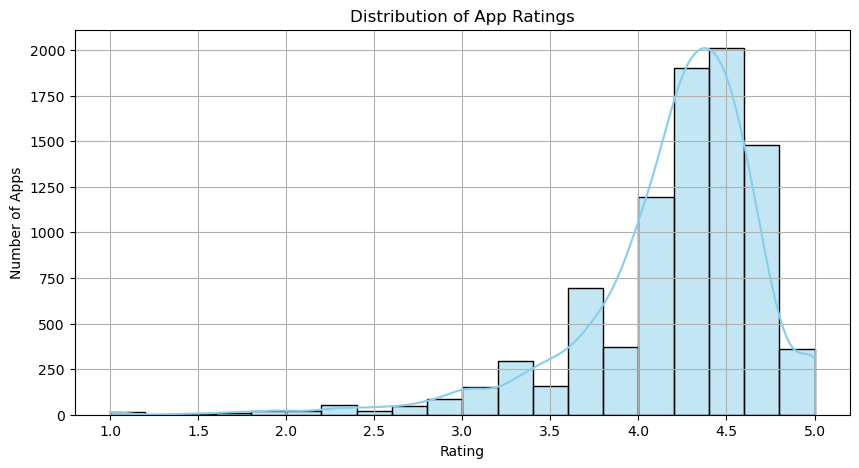

In [52]:
# Rating distribution
plt.figure(figsize=(10, 5))
sns.histplot(apps_df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.grid(True)
plt.show()

# Count of Apps by Category

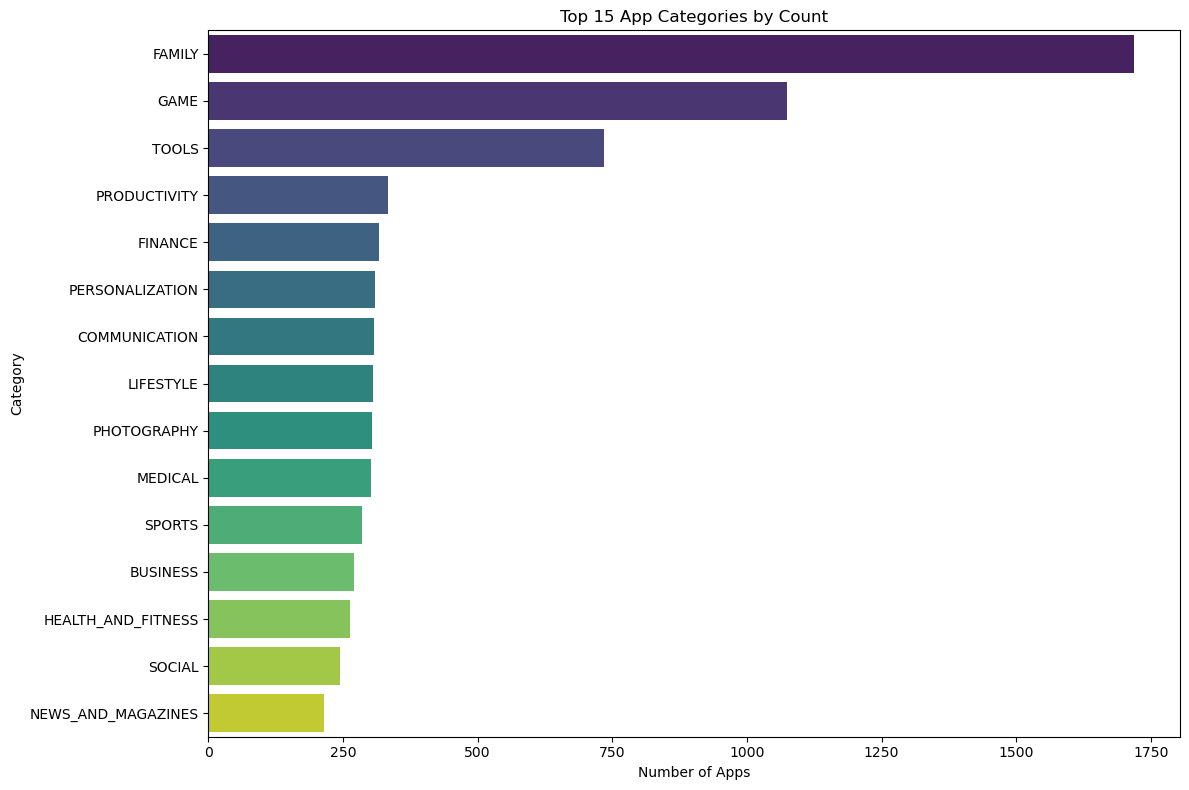

In [53]:
# Count plot by category
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=apps_df,
              order=apps_df['Category'].value_counts().index[:15], palette='viridis')
plt.title('Top 15 App Categories by Count')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


# Free vs Paid Apps Count

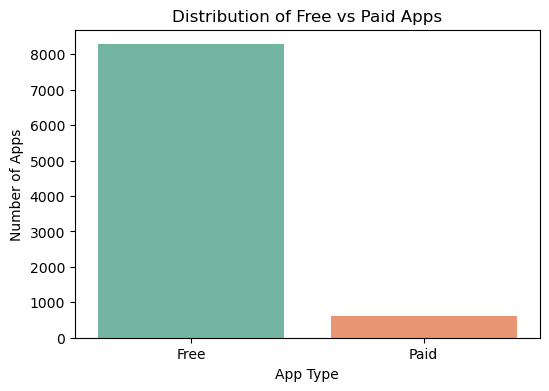

In [54]:
# Count of free vs paid apps
plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=apps_df, palette='Set2')
plt.title('Distribution of Free vs Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Number of Apps')
plt.show()


# Average Rating by App Type

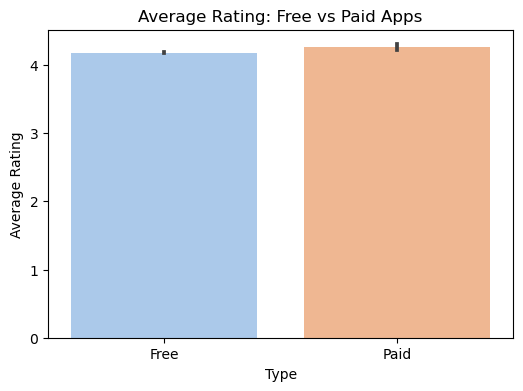

In [55]:
# Average rating for Free vs Paid
plt.figure(figsize=(6, 4))
sns.barplot(x='Type', y='Rating', data=apps_df, palette='pastel')
plt.title('Average Rating: Free vs Paid Apps')
plt.ylabel('Average Rating')
plt.show()


# Top 10 Categories by Total Installs

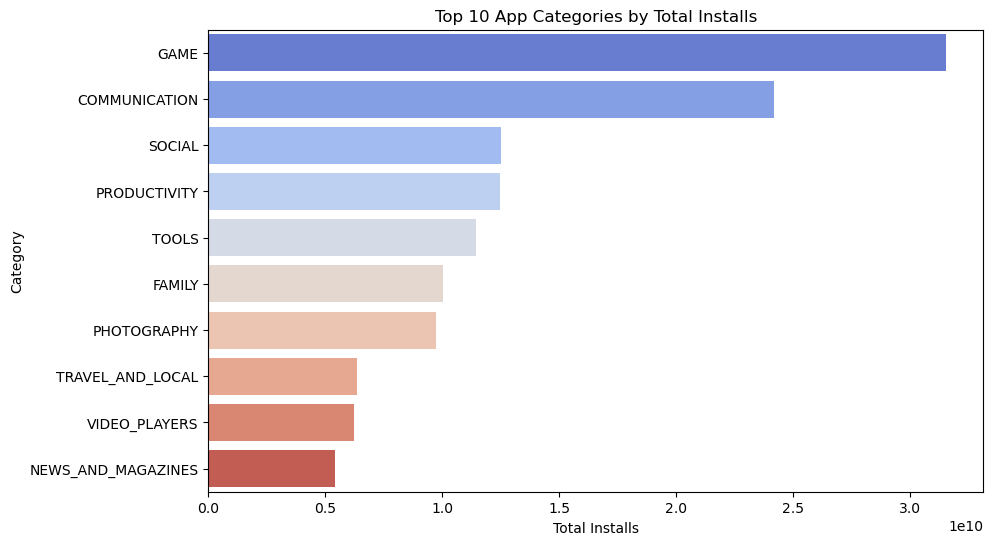

In [57]:
# Total installs per category
top_installs = apps_df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_installs.values, y=top_installs.index, palette='coolwarm')
plt.title('Top 10 App Categories by Total Installs')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.show()


# Scatter Plot – Installs vs Rating

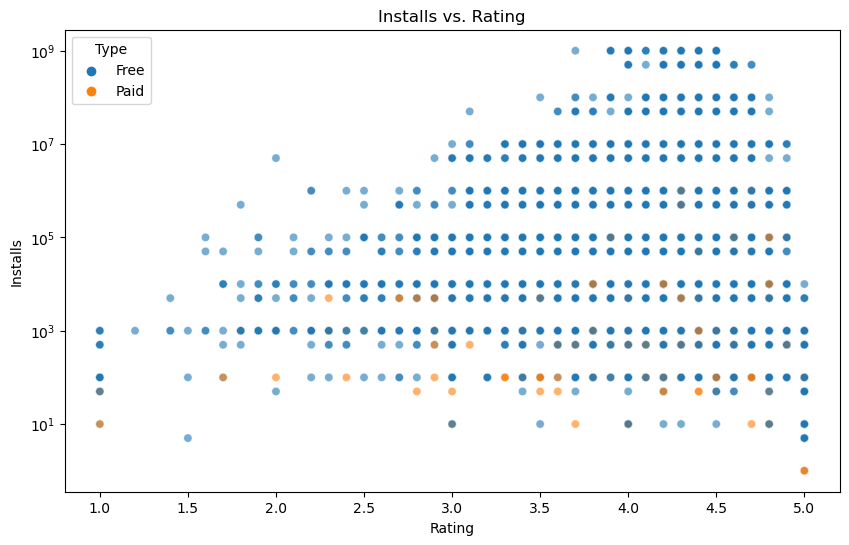

In [58]:
# Scatter of Installs vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Installs', data=apps_df, alpha=0.6, hue='Type')
plt.title('Installs vs. Rating')
plt.ylabel('Installs')
plt.xlabel('Rating')
plt.yscale('log')  # Optional for better scale visibility
plt.show()


# Insights 

Most apps are rated between 4.0–4.5, indicating high user satisfaction.

FAMILY, GAME, and TOOLS are the top categories by app count.

Majority of apps are free, but paid apps slightly outperform in rating on average.

GAME and COMMUNICATION apps dominate total installs.

Higher installs are loosely correlated with higher ratings, especially for free apps.




# Sentiment Distribution (All Reviews)

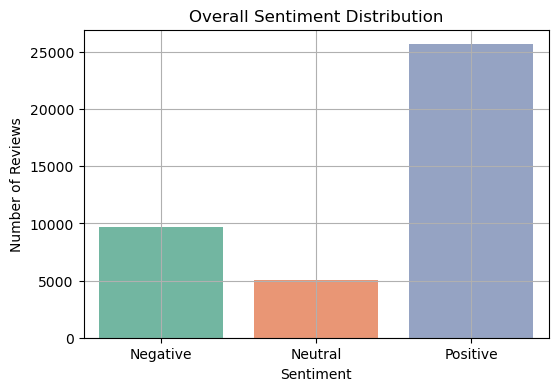

In [59]:
# Plot count of sentiments
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=merged_df, palette='Set2')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


# Sentiment by App Type (Free vs Paid)

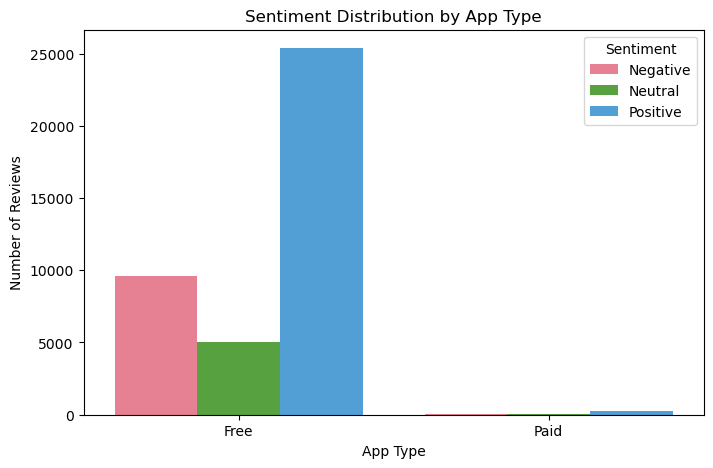

In [60]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Type', hue='Sentiment', data=merged_df, palette='husl')
plt.title('Sentiment Distribution by App Type')
plt.xlabel('App Type')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()


# Sentiment by Category (Top 6 Categories) 

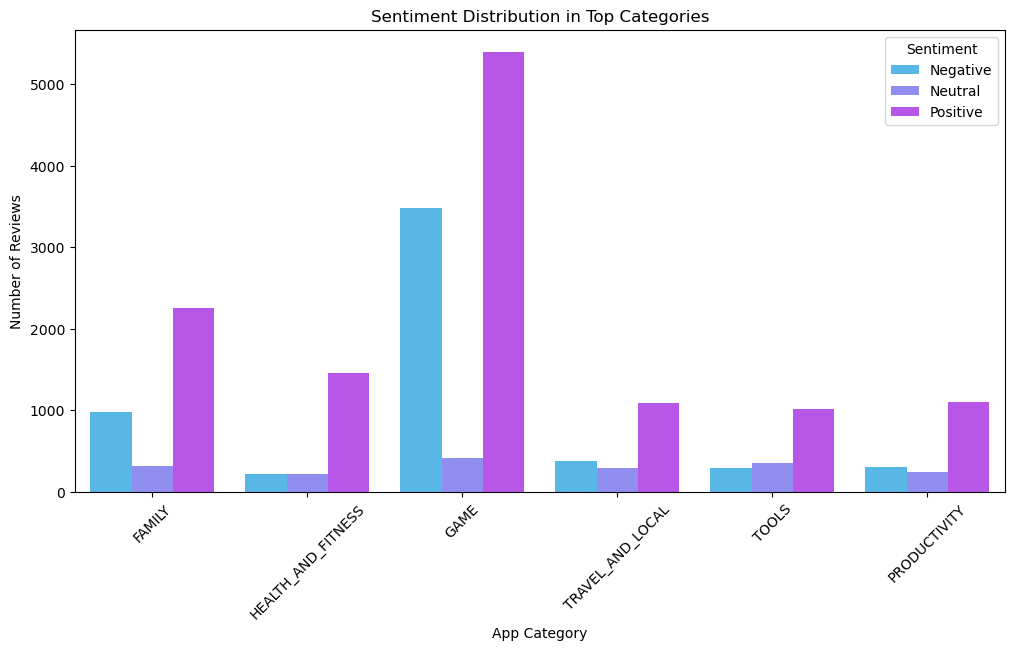

In [61]:
# Get top categories by review count
top_cats = merged_df['Category'].value_counts().head(6).index
filtered = merged_df[merged_df['Category'].isin(top_cats)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Category', hue='Sentiment', data=filtered, palette='cool')
plt.title('Sentiment Distribution in Top Categories')
plt.xlabel('App Category')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()


# Sentiment Polarity Distribution

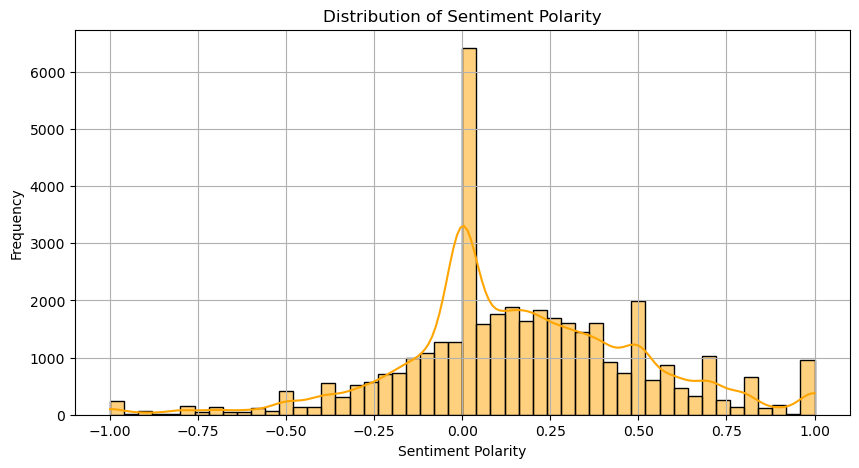

In [62]:
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['Sentiment_Polarity'].dropna(), bins=50, kde=True, color='orange')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Insights 

Most reviews are positive, which aligns with high app ratings.

Free apps get more reviews, and most of them are positive.

GAME and FAMILY apps have a broad spread of user sentiment.

Sentiment polarity is skewed toward the positive side (~0.4 average).

